In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importação de pacotes**

In [4]:
# Biblioteca para a manipulação de vetores e matrizes
import numpy as np

# Importa a biblioteca OpenCV
import cv2

# A importação desse pacote é necessária no Colab pois a função cv2.imshow não funciona
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt   # Biblioteca utilizada para plotar figuras
                                  # Pode ser usada também para ler figuras do disco

# Hough para círculos
import scipy.ndimage as ndi

## **Leitura, Visualização e Escrita de imagens usando a biblioteca OpenCV**

Tipo de dado da matriz imagem: uint8
nrows: 512
ncols: 512


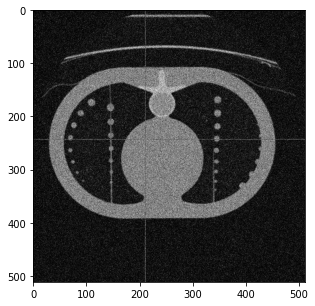

In [24]:
# Lê uma imagem e mostra informações básicas sobre ela

img_path = "/content/drive/MyDrive/PDI/"
img_filename = "Lung4.jpg"

# Lê imagem e automaticamente converte para 1 canal de cinza
img = cv2.imread(img_path + img_filename, cv2.IMREAD_GRAYSCALE)


print('Tipo de dado da matriz imagem:', img.dtype)   # Imprime o tipo de dado da matriz imagem 
print('nrows:',img.shape[0])                         # Imprime a altura da imagem 
print('ncols:',img.shape[1])                         # Imprime a largura da imagem 


plt.figure(figsize=[5,5])
plt.imshow(img, 'gray')

# Visualização de imagens

#cv2_imshow(img)         # Função para vizualizar uma imagem em colab
cv2.waitKey(0)          # Aguarda até que uma tecla seja precionada 
cv2.destroyAllWindows() # Destroi todas as janelas

## **Definindo as funções de correlação e convolução**

In [6]:
#
# Operação de correlação
#
def correlation(img, w):
    '''Calcula a correlação cruzada entre a imagem img e o filtro w.
    
       Parâmetros
       ----------
       img : numpy array.
           Imagem a ser filtrada.
       w : numpy array.
           Filtro a ser utilizada na correlação cruzada.
       
       Return
       -------
       img_filtered : numpy array, mesmo tamanho que img
           Imagem filtrada
    '''

    numRows, numCols = img.shape
    fNumRows, fNumCols = w.shape   # fNumRows=a+1 e fNumCols=b+1 (a e b da fórmula acima)

    halfRSize = fNumRows//2        # O operador // retorna a parte inteira da divisão
    halfCSize = fNumCols//2

    imgPadded = np.zeros((numRows+fNumRows-1, numCols+fNumCols-1), dtype=img.dtype)
    for row in range(numRows):
        for col in range(numCols):   
            imgPadded[row+halfRSize, col+halfCSize] = img[row, col]
    # A estrutura for aninhada acima pode ser substituída por
    #imgPadded = np.pad(img, ((halfRSize,halfRSize),(halfCSize,halfCSize)), mode='constant')
    
    img_filtered = np.zeros((numRows, numCols))
    for row in range(numRows):
        for col in range(numCols):
            sum_region = 0
            for s in range(fNumRows):
                for t in range(fNumCols):
                    # O índice do array na soma abaixo é diferente do utilizado na fórmula da 
                    # correlação porque estamos utilizando a imagem preenchida com zeros. O 
                    # pixel (0,0)  na imagem preenchida corresponde ao pixel (x+s-a/2, y+t-b/2) 
                    # da imagem original
                    sum_region += w[s, t]*imgPadded[row+s, col+t]
            img_filtered[row, col] = sum_region

            # O loop aninhado acima pode ser substituído por
            # patch = imgPadded[row:row+fNumRows, col:col+fNumCols]
            # img_filtered[row, col] = np.sum(w*patch)
            
    return img_filtered

#
# Operação de convolução
#
def convolution(img, w):
    '''Calcula a convolução entre a imagem img e o filtro w.
    
       Parâmetros
       ----------
       img : numpy array.
           Imagem a ser filtrada.
       w : numpy array.
           Filtro a ser utilizada na correlação cruzada.
       
       Return
       -------
       img_filtered : numpy array, mesmo tamanho que img
           Imagem filtrada
    '''
    # Inverte o filtro
    w_inv = w[::-1, ::-1]

    img_filtered = correlation(img, w_inv)

    return img_filtered

Text(0.5, 1.0, 'Imagem de bordas')

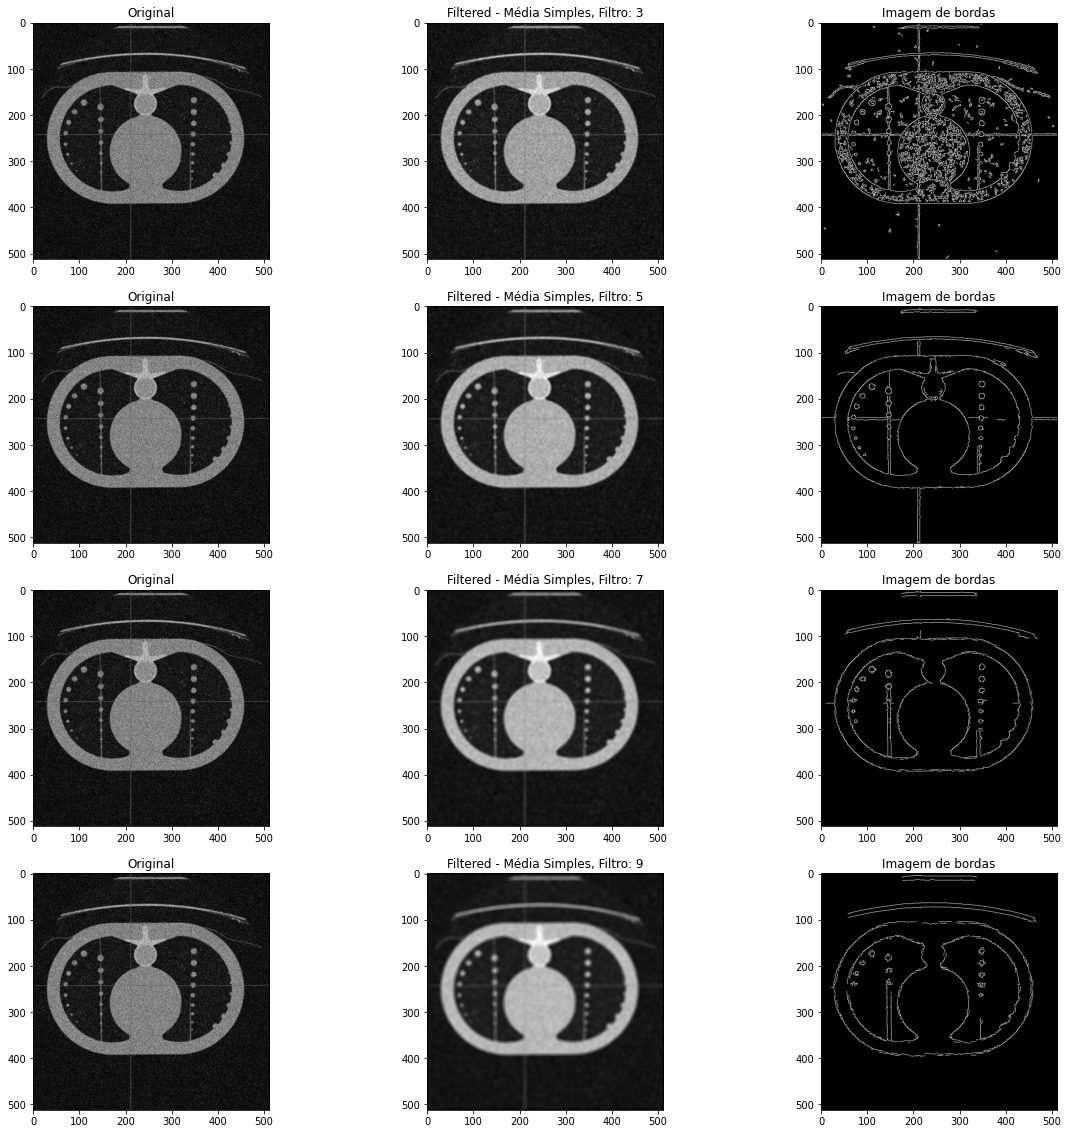

In [7]:
plt.figure(figsize=[20,20])

# Cria filtro de média simples com tamanho SxS

###################### FILTRO: 3 ######################
S = 3
w = np.full([S,S], 1./S**2)

# Realiza a convolução da imagem img com o filtro w
img_filtered_media = convolution(img, w) 

plt.subplot(4,3,1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,2)
plt.imshow(img_filtered_media, 'gray')
plt.title('Filtered - Média Simples, Filtro: 3')

img_edges = cv2.Canny(((img_filtered_media).astype(np.uint8)), 50, 120)  
plt.subplot(4, 3, 3)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 5 ######################
# Cria filtro de média simples com tamanho SxS
S = 5
w = np.full([S,S], 1./S**2)

# Realiza a convolução da imagem img com o filtro w
img_filtered_media = convolution(img, w) 

plt.subplot(4,3,4)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,5)
plt.imshow(img_filtered_media, 'gray')
plt.title('Filtered - Média Simples, Filtro: 5')

img_edges = cv2.Canny(((img_filtered_media).astype(np.uint8)), 50, 120)  
plt.subplot(4, 3, 6)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 5 ######################
# Cria filtro de média simples com tamanho SxS
S = 7
w = np.full([S,S], 1./S**2)

# Realiza a convolução da imagem img com o filtro w
img_filtered_media = convolution(img, w) 

plt.subplot(4,3,7)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,8)
plt.imshow(img_filtered_media, 'gray')
plt.title('Filtered - Média Simples, Filtro: 7')

img_edges = cv2.Canny(((img_filtered_media).astype(np.uint8)), 50, 120)  
plt.subplot(4, 3, 9)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 5 ######################
# Cria filtro de média simples com tamanho SxS
S = 9
w = np.full([S,S], 1./S**2)

# Realiza a convolução da imagem img com o filtro w
img_filtered_media = convolution(img, w) 

plt.subplot(4,3,10)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,11)
plt.imshow(img_filtered_media, 'gray')
plt.title('Filtered - Média Simples, Filtro: 9')

img_edges = cv2.Canny(((img_filtered_media).astype(np.uint8)), 50, 120)  
plt.subplot(4, 3, 12)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

## **Filtro Gaussiano 2D**

In [8]:

# Definição de um filtro Gaussiano 2D
def gaussian_filter_2d(filter_size):
    # Note que o desvio padrão está sendo definido com base no tamanho do filtro
    sigma = filter_size/6

    # Definição as coordenadas do matriz
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()

    # Cria o filtro Gaussino
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
        for col in range(filter_size):
            y = y_vals[col]
            z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

Text(0.5, 1.0, 'Imagem de bordas')

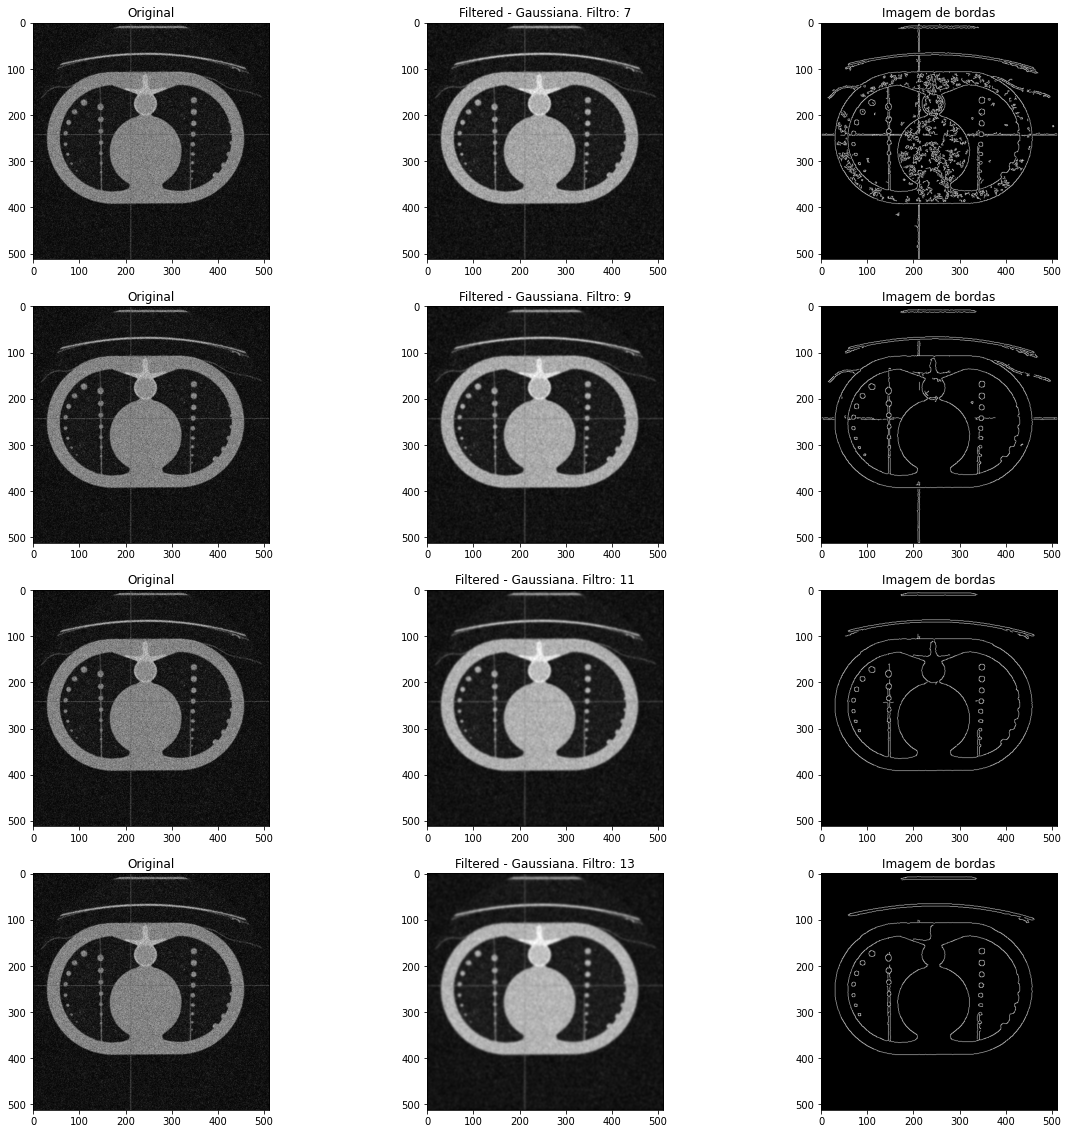

In [9]:
# Aplicação do Filtro Gaussiano na imagem original
# Plotagem
plt.figure(figsize=[20,20])

###################### FILTRO: 7 ######################
filter_size = 7
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))

plt.subplot(4,3,1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,2)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 7')

img_edges = cv2.Canny(((img_filtered_gausian2D).astype(np.uint8)), 50, 120)  
plt.subplot(4,3,3)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 9 ######################
filter_size = 9
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))

plt.subplot(4,3,4)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,5)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 9')

img_edges = cv2.Canny(((img_filtered_gausian2D).astype(np.uint8)), 50, 120)  
plt.subplot(4,3,6)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 11 ######################
filter_size = 11
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))

plt.subplot(4,3,7)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,8)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 11')

img_edges = cv2.Canny(((img_filtered_gausian2D).astype(np.uint8)), 50, 120)  
plt.subplot(4,3,9)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 13 ######################
filter_size = 13
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))

plt.subplot(4,3,10)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(4,3,11)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 13')

img_edges = cv2.Canny(((img_filtered_gausian2D).astype(np.uint8)), 50, 120)  
plt.subplot(4,3,12)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

## **Ruído Gaussiano e Salt & Pepper**

In [10]:
#
# Funções usada para a adição de ruído a uma imagem DE 1 CANAL APENAS
#
import os

#
# Vamos adicionar Ruído Gaussiano
#
def noisy_gaussian(image, mu=0, std=0.1, max_level=255):  # mu = média guassiana; qto maior std, mais ruído.
  row,col = image.shape

  gauss = np.random.normal(mu, std, (row,col)) * max_level # normalização para ficar com intensidade até 255 após inserção de ruído
  gauss = gauss.reshape(row,col)
  noisy = image + gauss
  return noisy

#
# Ruído Salt & Pepper
#
def noisy_salt_and_pepper(image, s_vs_p=0.5, amount=0.005, pepper=0, salt=255): # amount: quantidade de ruído sendo adicionado; s_vs_p: proporção de sal
  row,col = image.shape
  out = np.copy(image)

  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[tuple(coords)] = salt

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[tuple(coords)] = pepper
  return out

Text(0.5, 1.0, 'Com ruído salt & pepper')

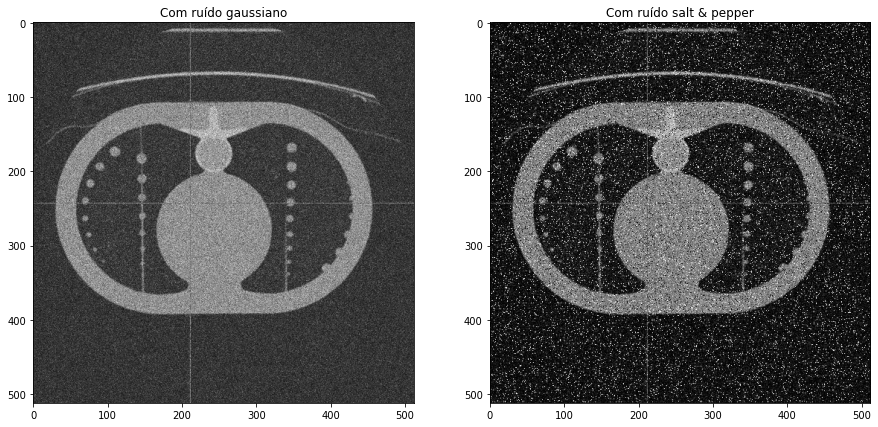

In [11]:
#
# Adiciona ruído Gaussiano e Sal&Pepper a imagem
#
img_noise_gauss = noisy_gaussian(img, 0, 0.05)  # (image, mu=0, std=0.1, max_level=255): mu = média guassiana; qto maior std, mais ruído.
img_noise_sp = noisy_salt_and_pepper(img, 0.5, 0.1)  # 0.5, 0.05: proporção e quantidade de sal e pimenta, respectivamente.

plt.figure(figsize=[15, 15])
plt.subplot(1, 2, 1)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Com ruído gaussiano')

plt.subplot(1, 2, 2)
plt.imshow(img_noise_sp, 'gray')
plt.title('Com ruído salt & pepper')

## **Filtro da mediana**

Text(0.5, 1.0, 'Imagem de bordas')

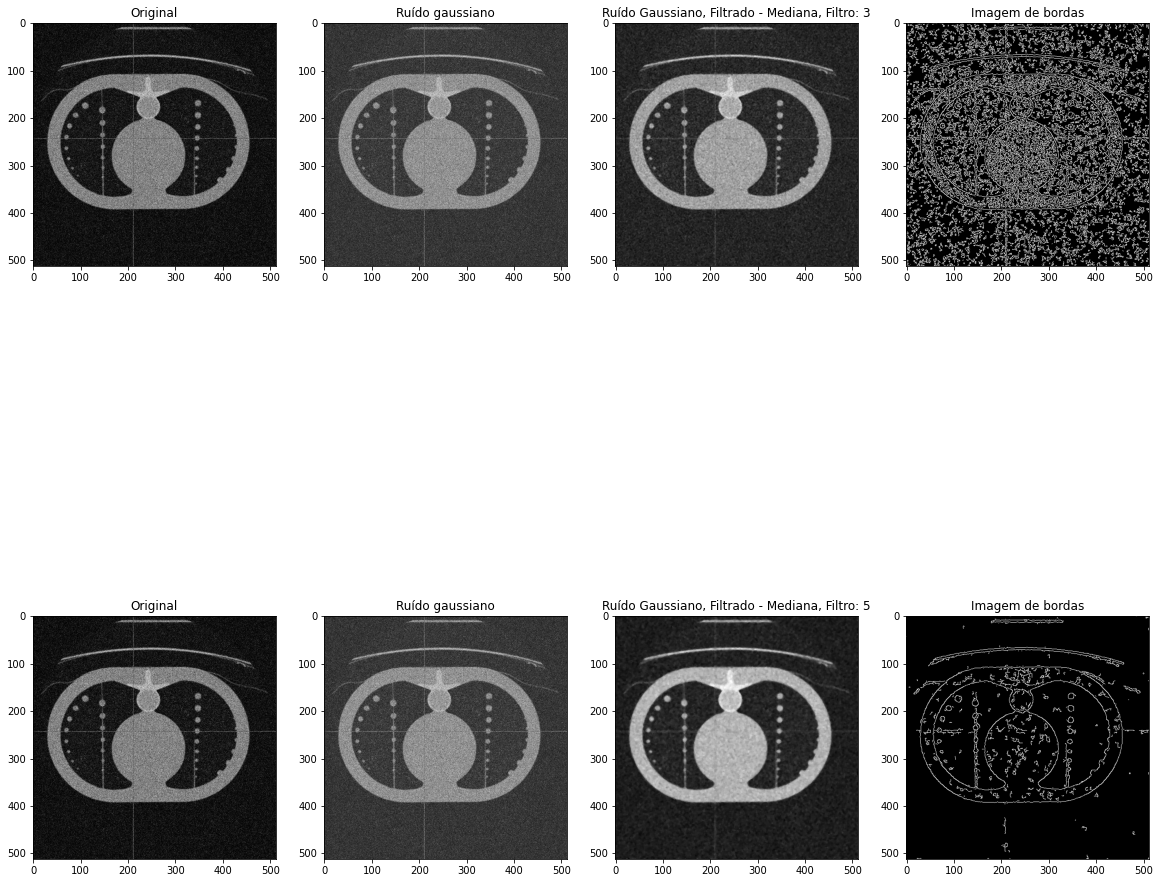

In [12]:
plt.figure(figsize=[20, 20])

# Aplica o filtro mediano nas imagens corrompidas por ruído Gaussiano

###################### FILTRO: 3 ######################
img_denoised_noise_gauss_filtered_median = cv2.medianBlur(np.float32(img_noise_gauss), 3)  

plt.subplot(2, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(2, 4, 2)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(2, 4, 3)
plt.imshow(img_denoised_noise_gauss_filtered_median, 'gray')
plt.title('Ruído Gaussiano, Filtrado - Mediana, Filtro: 3') 

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_median).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 5 ######################
img_denoised_noise_gauss_filtered_median = cv2.medianBlur(np.float32(img_noise_gauss), 5)  

plt.subplot(2, 4, 5)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(2, 4, 6)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(2, 4, 7)
plt.imshow(img_denoised_noise_gauss_filtered_median, 'gray')
plt.title('Ruído Gaussiano, Filtrado - Mediana, Filtro: 5') 

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_median).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

Text(0.5, 1.0, 'Imagem de bordas')

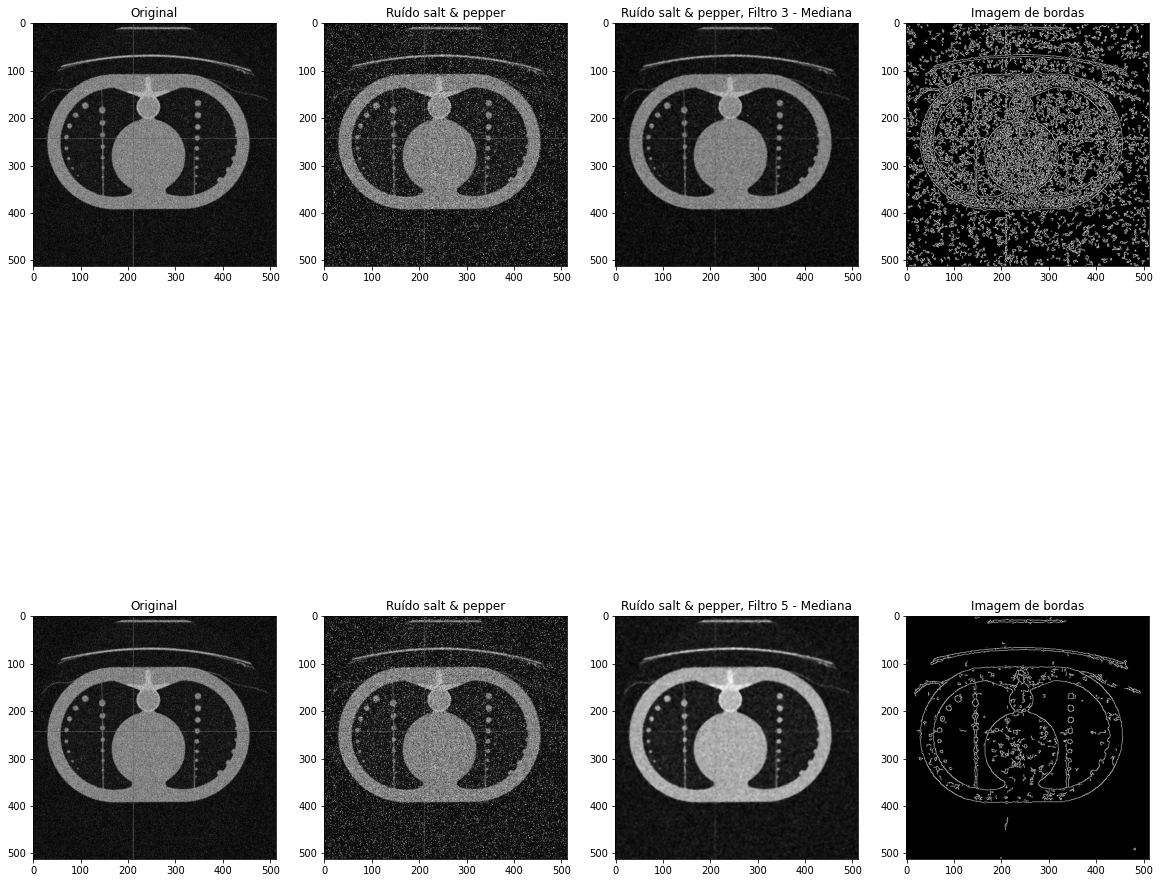

In [13]:
plt.figure(figsize=[20, 20])

# Aplica o filtro mediano nas imagens corrompidas por ruído Salt and Pepper

###################### FILTRO: 3 ######################
filtro = 3
img_denoised_noise_sp_filtered_median = cv2.medianBlur(np.float32(img_noise_sp), filtro) 

plt.subplot(2, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original')
 
plt.subplot(2, 4, 2)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído salt & pepper')

plt.subplot(2, 4, 3)
plt.imshow(img_denoised_noise_sp_filtered_median, 'gray')
plt.title('Ruído salt & pepper, Filtro 3 - Mediana')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_median).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 5 ######################
filtro = 5
img_denoised_noise_sp_filtered_median = cv2.medianBlur(np.float32(img_noise_sp), filtro) 

plt.subplot(2, 4, 5)
plt.imshow(img, 'gray')
plt.title('Original')
 
plt.subplot(2, 4, 6)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído salt & pepper')

plt.subplot(2, 4, 7)
plt.imshow(img_denoised_noise_sp_filtered_median, 'gray')
plt.title('Ruído salt & pepper, Filtro 5 - Mediana')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_median).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

## **Filtro Bilateral**

Text(0.5, 1.0, 'Imagem de bordas')

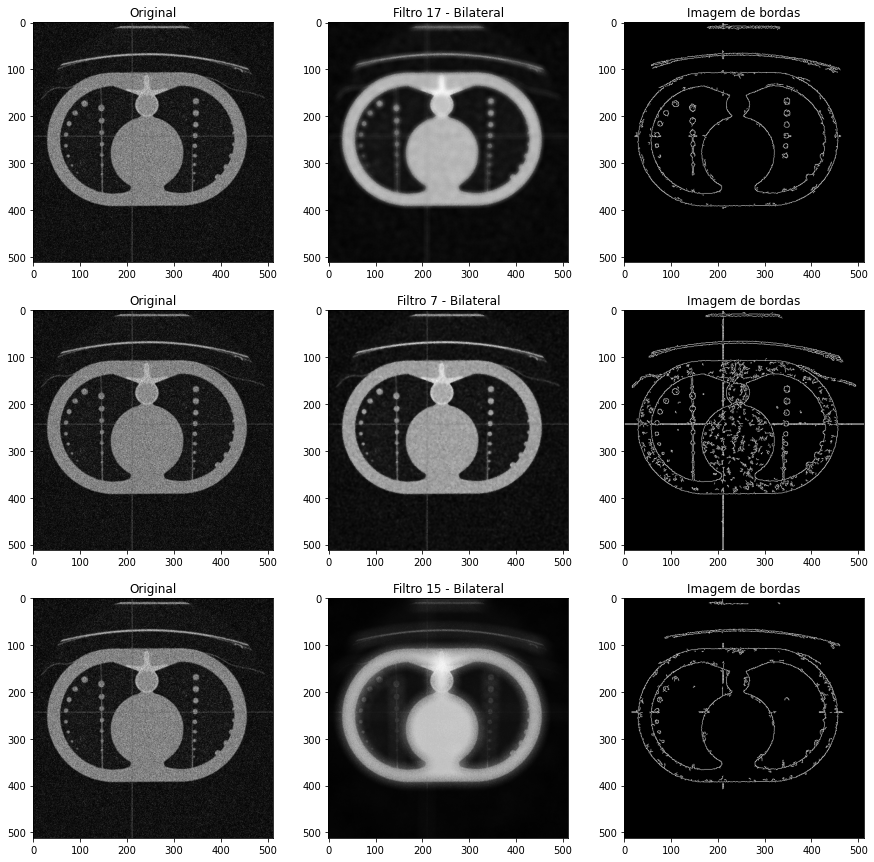

In [14]:
# FILTRO BILATERAL - IMAGEM NÃO CORROMPIDA

# Apply bilateral filter with d = 7,
# sigmaColor = sigmaSpace = 25.

plt.figure(figsize=[15, 15])

###################### FILTRO: 17 ######################
filtro = 17
sigma1 = 100   # sigma de intensidade/cor
sigma2 = 100   # sigma de espaço/distancia
img_filtered_bilateral = cv2.bilateralFilter(np.float32(img), filtro, sigma1, sigma2) 

plt.subplot(3, 3, 1)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 3, 2)
plt.imshow(img_filtered_bilateral, 'gray')
plt.title('Filtro 17 - Bilateral')

img_edges = cv2.Canny(((img_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 3, 3)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 7 ######################
filtro = 7
sigma1 = 50    # sigma de intensidade/cor
sigma2 = 50    # sigma de espaço/distancia
img_filtered_bilateral = cv2.bilateralFilter(np.float32(img), filtro, sigma1, sigma2) 

plt.subplot(3, 3, 4)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 3, 5)
plt.imshow(img_filtered_bilateral, 'gray')
plt.title('Filtro 7 - Bilateral')

img_edges = cv2.Canny(((img_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 3, 6)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 43 ######################
filtro = 43
sigma1 = 100    # sigma de intensidade/cor
sigma2 = 100    # sigma de espaço/distancia
img_filtered_bilateral = cv2.bilateralFilter(np.float32(img), filtro, sigma1, sigma2) 

plt.subplot(3, 3, 7)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 3, 8)
plt.imshow(img_filtered_bilateral, 'gray')
plt.title('Filtro 15 - Bilateral')

img_edges = cv2.Canny(((img_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 3, 9)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

Text(0.5, 1.0, 'Imagem de bordas')

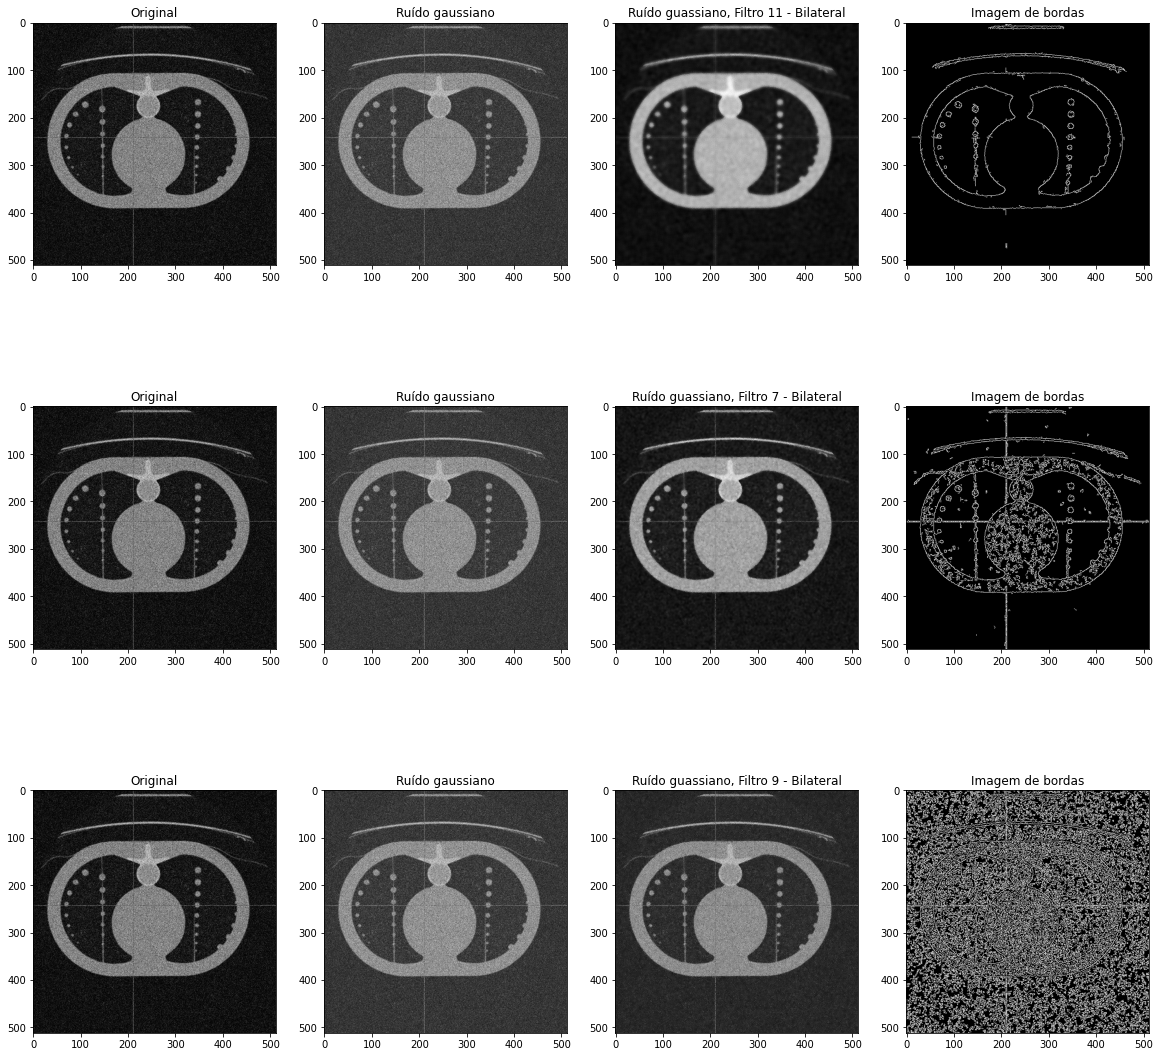

In [15]:

# FILTRO BILATERAL - IMAGEM CORROMPIDA - RUÍDO GAUSSIANO

# Apply bilateral filter with d = 7,
# sigmaColor = sigmaSpace = 25.

plt.figure(figsize=[20, 20])

###################### FILTRO: 11 ######################
filtro = 11
sigma1 = 100   # sigma de intensidade/cor
sigma2 = 100  # sigma de espaço/distancia
img_denoised_noise_gauss_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_gauss), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 2)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(3, 4, 3)
plt.imshow(img_denoised_noise_gauss_filtered_bilateral, 'gray')
plt.title('Ruído guassiano, Filtro 11 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 7 ######################
filtro = 7
sigma1 = 50   # sigma de intensidade/cor
sigma2 = 50    # sigma de espaço/distancia
img_denoised_noise_gauss_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_gauss), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 5)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 6)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(3, 4, 7)
plt.imshow(img_denoised_noise_gauss_filtered_bilateral, 'gray')
plt.title('Ruído guassiano, Filtro 7 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 9 ######################
filtro = 9
sigma1 = 20    # sigma de intensidade/cor
sigma2 = 25    # sigma de espaço/distancia
img_denoised_noise_gauss_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_gauss), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 9)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 10)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(3, 4, 11)
plt.imshow(img_denoised_noise_gauss_filtered_bilateral, 'gray')
plt.title('Ruído guassiano, Filtro 9 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 12)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

Text(0.5, 1.0, 'Imagem de bordas')

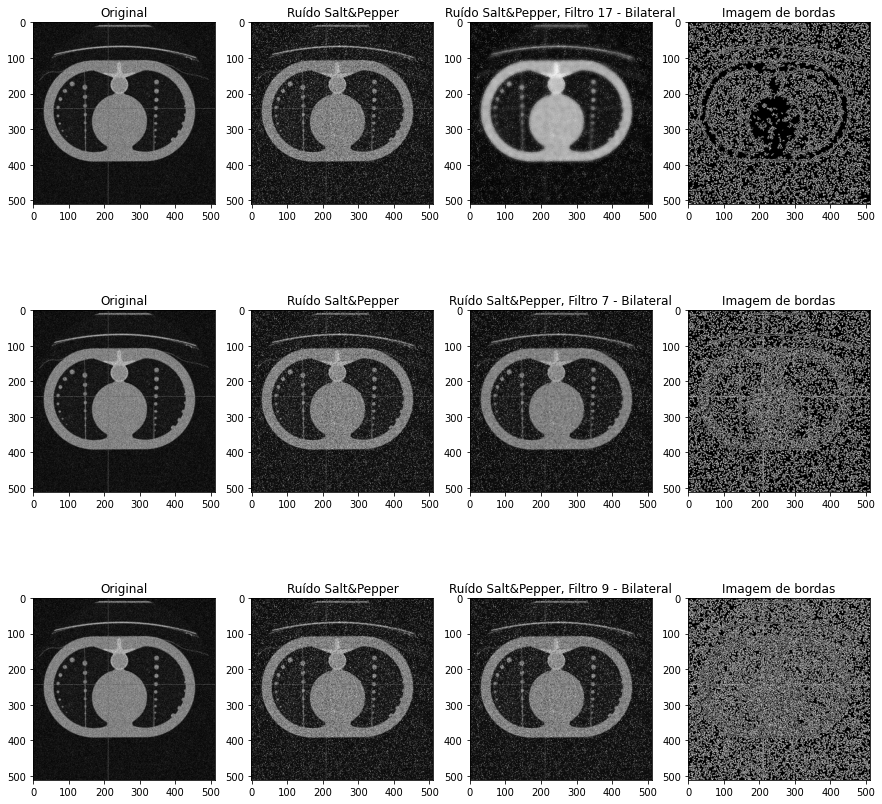

In [16]:
# FILTRO BILATERAL - IMAGEM CORROMPIDA - RUÍDO SALT AND PEPPER

# Apply bilateral filter with d = 7,
# sigmaColor = sigmaSpace = 25.

plt.figure(figsize=[15, 15])

###################### FILTRO: 17 ######################
filtro = 17
sigma1 = 100   # sigma de intensidade/cor
sigma2 = 100   # sigma de espaço/distancia
img_denoised_noise_sp_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_sp), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 2)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído Salt&Pepper')

plt.subplot(3, 4, 3)
plt.imshow(img_denoised_noise_sp_filtered_bilateral, 'gray')
plt.title('Ruído Salt&Pepper, Filtro 17 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 7 ######################
filtro = 7
sigma1 = 50    # sigma de intensidade/cor
sigma2 = 50    # sigma de espaço/distancia
img_denoised_noise_sp_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_sp), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 5)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 6)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído Salt&Pepper')

plt.subplot(3, 4, 7)
plt.imshow(img_denoised_noise_sp_filtered_bilateral, 'gray')
plt.title('Ruído Salt&Pepper, Filtro 7 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

###################### FILTRO: 9 ######################
filtro = 9
sigma1 = 20    # sigma de intensidade/cor
sigma2 = 25    # sigma de espaço/distancia
img_denoised_noise_sp_filtered_bilateral = cv2.bilateralFilter(np.float32(img_noise_sp), filtro, sigma1, sigma2) 

plt.subplot(3, 4, 9)
plt.imshow(img, 'gray')
plt.title('Original')
                                                                                                               
plt.subplot(3, 4, 10)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído Salt&Pepper')

plt.subplot(3, 4, 11)
plt.imshow(img_denoised_noise_sp_filtered_bilateral, 'gray')
plt.title('Ruído Salt&Pepper, Filtro 9 - Bilateral')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_bilateral).astype(np.uint8)), 50, 120)  
plt.subplot(3, 4, 12)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

## **Non-Local Means**

Text(0.5, 1.0, 'Imagem de bordas')

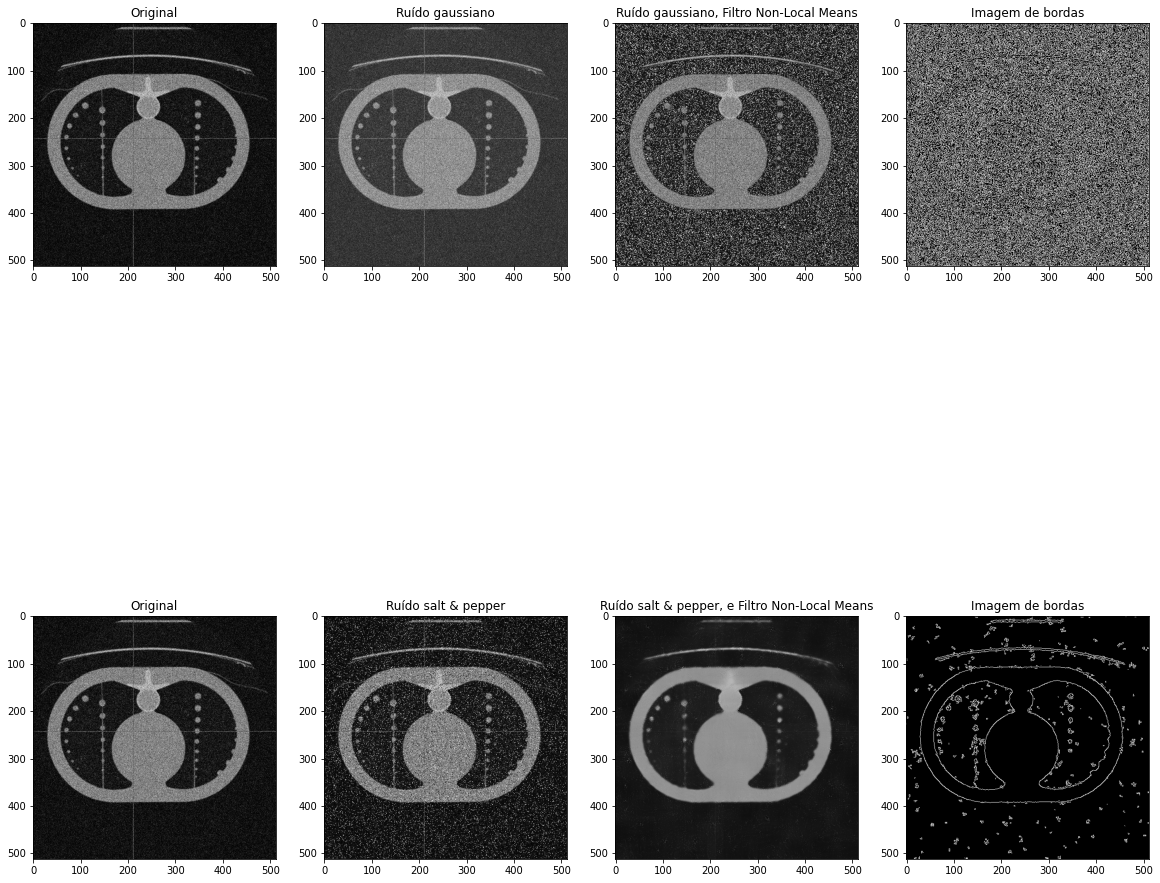

In [17]:
plt.figure(figsize=[20, 20])

img_denoised_noise_gauss_filtered_NlMeans = cv2.fastNlMeansDenoising(np.uint8(img_noise_gauss), h=5, templateWindowSize=5, searchWindowSize=15)

plt.subplot(2, 4, 1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(2, 4, 2)
plt.imshow(img_noise_gauss, 'gray')
plt.title('Ruído gaussiano')

plt.subplot(2, 4, 3)
plt.imshow(img_denoised_noise_gauss_filtered_NlMeans, 'gray')
plt.title('Ruído gaussiano, Filtro Non-Local Means')

img_edges = cv2.Canny(((img_denoised_noise_gauss_filtered_NlMeans).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 4)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

img_denoised_noise_sp_filtered_NlMeans = cv2.fastNlMeansDenoising(np.uint8(img_noise_sp), h=40, templateWindowSize=9, searchWindowSize=35)

plt.subplot(2, 4, 5)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(2, 4, 6)
plt.imshow(img_noise_sp, 'gray')
plt.title('Ruído salt & pepper')

plt.subplot(2, 4, 7)
plt.imshow(img_denoised_noise_sp_filtered_NlMeans, 'gray')
plt.title('Ruído salt & pepper, e Filtro Non-Local Means')

img_edges = cv2.Canny(((img_denoised_noise_sp_filtered_NlMeans).astype(np.uint8)), 50, 120)  
plt.subplot(2, 4, 8)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')


## **Das Análises acima, a solução mais adequada é: Convolução da imagem original com filto Gaussiano 2D 11x11**

Text(0.5, 1.0, 'Imagem de bordas')

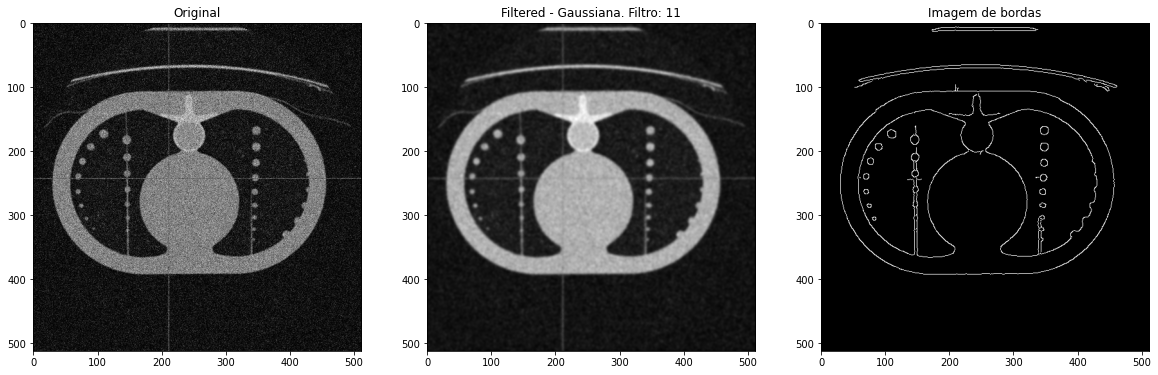

In [18]:
plt.figure(figsize=[20, 20])

###################### FILTRO: 11 ######################
filter_size = 11
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))

plt.subplot(1,3,1)
plt.imshow(img, 'gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 11')

img_edges = cv2.Canny(((img_filtered_gausian2D).astype(np.uint8)), 50, 120)  
plt.subplot(1,3,3)
plt.imshow(img_edges, cmap='gray')
plt.title('Imagem de bordas')

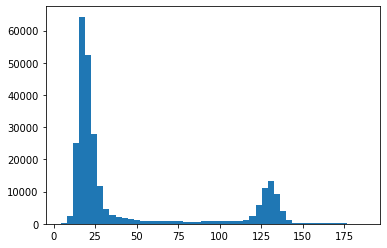

In [19]:
# Plota o histograma da imagem com filtro 
_ = plt.hist(img_filtered_gausian2D.flatten(), 50)

Limiar (Otsu): 73.0


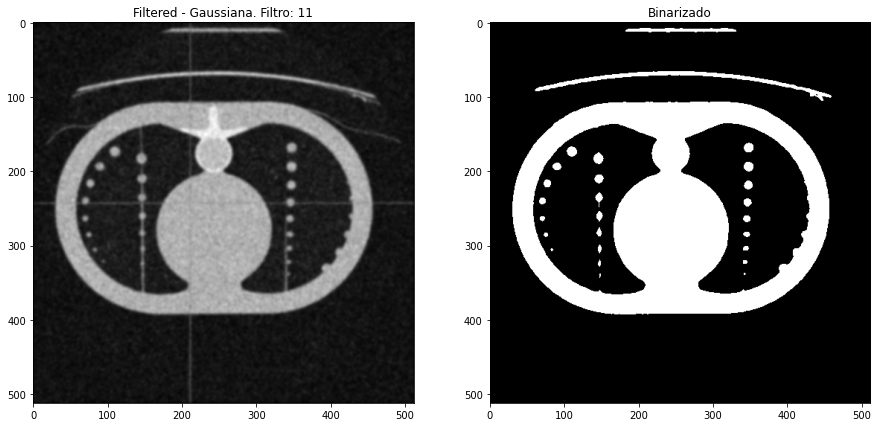

In [20]:
# PROCESSO BINARIZAÇÃO - TÉCNICA DE OTSU.

# A binariazação será realizada com base na técnica de OTSU, que otimiza o limiar
plt.figure(figsize=[15, 15])

# threshold de Otsu após filtragem
threshold,limiarizacao = cv2.threshold((img_filtered_gausian2D).astype(np.uint8),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Limiar (Otsu):', threshold)
plt.subplot(1, 2, 1)
plt.imshow(img_filtered_gausian2D, 'gray')
plt.title('Filtered - Gaussiana. Filtro: 11')


plt.subplot(1, 2, 2)
plt.imshow(limiarizacao, 'gray')
plt.title('Binarizado')

plt.show()

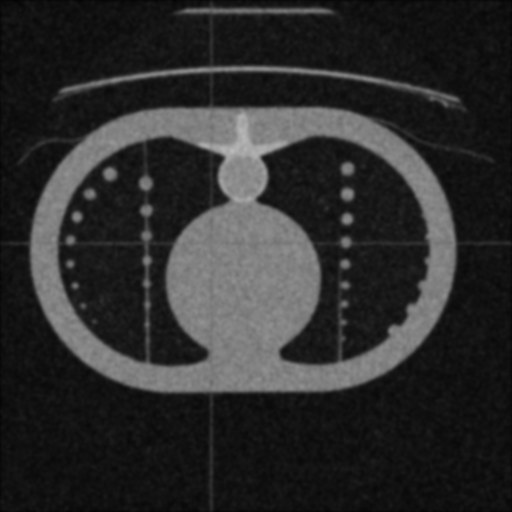

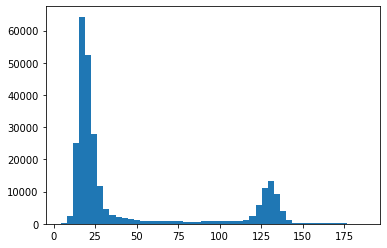

In [21]:
img_filtered_gausian2D.astype(float)  # transformar "img" para float

cv2_imshow(img_filtered_gausian2D)
cv2.imwrite("img_filtered_gausian2D.jpg", img_filtered_gausian2D)    
cv2.waitKey(0)

_=plt.hist(img_filtered_gausian2D.flatten(), 50)

## **Implementação do acumulador de Hough para círculos**

In [22]:
#
# Função para imprimir círculos contidos na lista C na imagem img
#
def draw_circles(img, C, color=(255,0,0), thickness=2):  # C: lista de posições (raio r, x, y)
  circleCoordinates = np.argwhere(C)     
  res = np.zeros(img.shape, dtype=np.uint8)                                     #Extracting the circle information
  for r,x,y in circleCoordinates:
    res = cv2.circle( img, (y,x), r, color, thickness)
  return res # o retorno é a imagem com circulos



#
# Transformada de Hough para a detecção de círculos
#
def hough_circulos(img_edges, threshold, region, radius = None): # img_edges: imagem de bordas; region: define região que se quer trabalhar; radius: define o raio do circulo. se não passar o raio, trabalhoar com min e max (vide logo abaixo)
    (M,N) = img_edges.shape

    if radius == None:
        R_max = np.max((M,N))
        R_min = 1
    else:
        [R_min,R_max] = radius

    R = R_max - R_min

    # Inicializa o acumulador de Hough.
    # O acumulador é um array tridimensional com as dimensões representando
    # o raio e as coordenadas (X e Y) do centro do círculo.  
    # Fazendo o padding de 2 vezes o valor de R_max evita problemas de círculos 
    # detectados próximos às bordas da imagem. 
    A = np.zeros((R_max,M+2*R_max,N+2*R_max))
    B = np.zeros((R_max,M+2*R_max,N+2*R_max))

    # Pre-calcula todos os ângulos [0,360] para aumentar a velocidade de processamento
    theta = np.arange(0,360)*np.pi/180
    edges = np.argwhere(img_edges[:,:])                                               #[:,:]: Extrai todas as coordenadas das bordas

    for val in range(R):
        r = R_min+val

        # Cria um modelo (blueprint) de um círculo
        bprint = np.zeros((2*(r+1),2*(r+1)))      # matriz de zeros; (2*(r+1),2*(r+1): comsidera todos os gradientes do círculo
        (m,n) = (r+1,r+1)                         # Encontra o centro do filtro (são as coordenadas do centro)

        for angle in theta:
            x = int(np.round(r*np.cos(angle)))
            y = int(np.round(r*np.sin(angle)))
            bprint[m+x,n+y] = 1                    # incremento de uma unidade

        constant = np.argwhere(bprint).shape[0]

        for x,y in edges:                                                       #Para cada coordenada das bordas
            # Centraliza o modelo do círculo sobre as bordas
            # e atualiza o acumulador de Hough
            X = [x-m+R_max, x+m+R_max]                                          
            Y = [y-n+R_max, y+n+R_max]                                          
            A[r,X[0]:X[1],Y[0]:Y[1]] += bprint
            
        A[r][A[r]<threshold*constant/r] = 0                # aplicação de threshold no arranjo acumulador; valores abaixo de um threshold serão zerados

# correção para não sair fora da região das imagens
    for r,x,y in np.argwhere(A):
        temp = A[r-region:r+region,x-region:x+region,y-region:y+region]
        try:
            p,a,b = np.unravel_index(np.argmax(temp),temp.shape)
        except:
            continue
        B[r+(p-region),x+(a-region),y+(b-region)] = 1

    return B[:,R_max:-R_max,R_max:-R_max]  # retorna o arranjo com infomrações dos círculos

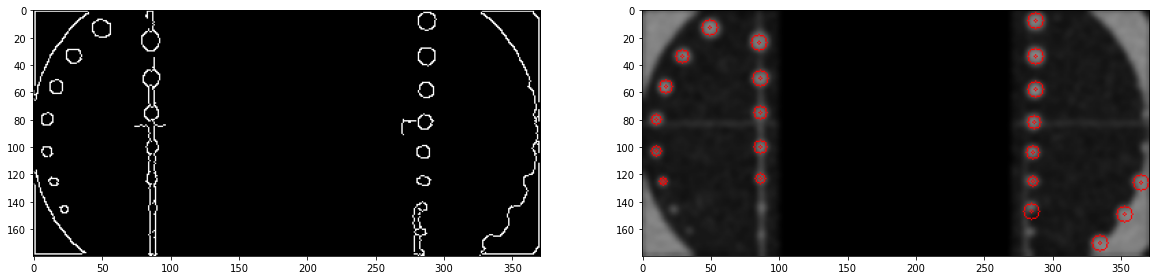

In [25]:

img_path = "/content/drive/MyDrive/PDI/"
img_filename = "Lung4.jpg"

# Lê imagem e automaticamente converte para 1 canal de cinza
img = cv2.imread(img_path + img_filename, cv2.IMREAD_GRAYSCALE)

img = img[160:340, 60:431]
img[0:180, 100:270] = 0 

 
# Aplica o filtro Gaussiano 2D na imagem original
filter_size = 11
sigma = filter_size/6
img_filtered_gausian2D = convolution(img, gaussian_filter_2d(filter_size))
    
img_denoised = np.uint8(img_filtered_gausian2D)

# Suaviza a imagem e detecta bordas usando a técnica de Canny
img_blurred = cv2.GaussianBlur(img_denoised, (5, 5), 5)
img_edges   = cv2.Canny(img_denoised, 50, 120)

plt.figure(figsize=[20,20])
plt.subplot(1, 2, 1)
plt.imshow(img_edges, 'gray')

threshold = 2
region = 10
radius = [1,7] # detectar círculos com raios no intervalo [...,...]    
circles = np.argwhere(hough_circulos(img_edges, threshold, region, radius)) 
img_res = cv2.cvtColor(img_blurred, cv2.COLOR_GRAY2RGB)
   
for r,x,y in circles:
  # Mostrar os círculos
  cv2.circle(img_res,(y,x),r,(255,0,0),1)
  # Mostrar os centros dos círculos
  cv2.circle(img_res,(y,x),1,(255,0,0),1)
plt.subplot(1, 2, 2)
plt.imshow(img_res)


In [26]:
# Quantidade de nódulos
print('No pulmão foram identificados',str(circles.shape[0]),'nódulos.')

No pulmão foram identificados 21 nódulos.


In [27]:
# Abaixo são apresentadas informações sobre os círculos/ nódulos (r,x,y)
print(circles)

[[  3 125  15]
 [  4  80  10]
 [  4 103  10]
 [  4 123  86]
 [  4 125 285]
 [  5  34  29]
 [  5  56  17]
 [  5  75  86]
 [  5  82 286]
 [  5 100  86]
 [  5 104 285]
 [  6   8 287]
 [  6  13  49]
 [  6  24  85]
 [  6  34 287]
 [  6  50  86]
 [  6  58 287]
 [  6 126 364]
 [  6 147 284]
 [  6 149 352]
 [  6 170 334]]


In [28]:
# Cálculo da soma das áreas
from math import pi
i = 0
for r in circles[:,0]:
  Area = pi*(r**2)
  i += 1
  print('Área',i,'= {:.1f}'.format(Area))

Área 1 = 28.3
Área 2 = 50.3
Área 3 = 50.3
Área 4 = 50.3
Área 5 = 50.3
Área 6 = 78.5
Área 7 = 78.5
Área 8 = 78.5
Área 9 = 78.5
Área 10 = 78.5
Área 11 = 78.5
Área 12 = 113.1
Área 13 = 113.1
Área 14 = 113.1
Área 15 = 113.1
Área 16 = 113.1
Área 17 = 113.1
Área 18 = 113.1
Área 19 = 113.1
Área 20 = 113.1
Área 21 = 113.1
